In [ ]:
#CLASSIFICATION

#Logistic Regression (Binary Classification)
#Logistic regression is used to predict the probability that a given input belongs to 
#a certain class (usually binary: 0 or 1, Yes or No, True or False).
we use sigmoid function

#Logistic Regression (Multiclass Classification)
Instead of using just one sigmoid function (as in binary), it uses the softmax function to output probabilities across multiple classes.
    
accuracy
precision
recall
R1
support




In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load sample data
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary classification: is class 0 or not

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [5]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sample input features (e.g., 2 features)
X = np.array([[2, 3],
              [1, 5],
              [2, 1],
              [6, 7]])

# Sample weights and bias (random or learned in real cases)
weights = np.array([0.4, -0.6])
bias = 0.1

# Linear combination
z = np.dot(X, weights) + bias

# Apply sigmoid
probabilities = sigmoid(z)

# Threshold: 0.5
predicted = probabilities >= 0.5  # This will return boolean values

# Display results
for i, prob in enumerate(probabilities):
    print(f"Input {i + 1} - Sigmoid Output: {prob:.3f} - Predicted: {predicted[i]}")


Input 1 - Sigmoid Output: 0.289 - Predicted: False
Input 2 - Sigmoid Output: 0.076 - Predicted: False
Input 3 - Sigmoid Output: 0.574 - Predicted: True
Input 4 - Sigmoid Output: 0.154 - Predicted: False


   Hours_Studied  Pass  Probability  Predicted
0              1     0     0.054940          0
1              2     0     0.154658          0
2              3     0     0.365389          0
3              4     1     0.644381          1
4              5     1     0.850802          1
5              6     1     0.947219          1
6              7     1     0.982602          1


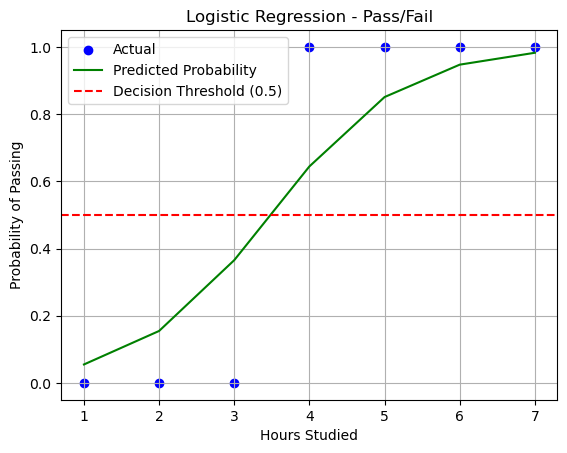

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7],
    'Pass': [0, 0, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Features and target
X = df[['Hours_Studied']]
y = df['Pass']

# Train model
model = LogisticRegression()
model.fit(X, y)

# Predict probability of passing for each input
df['Probability'] = model.predict_proba(X)[:, 1]
df['Predicted'] = model.predict(X)

# Show dataframe
print(df)

# Optional: plot
plt.scatter(df['Hours_Studied'], df['Pass'], label='Actual', color='blue')
plt.plot(df['Hours_Studied'], df['Probability'], label='Predicted Probability', color='green')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression - Pass/Fail')
plt.legend()
plt.grid(True)
plt.show()



 Test Data Predictions:
   Hours_Studied  Pass  Predicted  Probability
0              2     0          0     0.156975
1              3     0          0     0.363497
2              4     1          1     0.636563
3              5     1          1     0.843060
4              6     1          1     0.942777
5              7     1          1     0.980594

 Accuracy on test data: 1.00


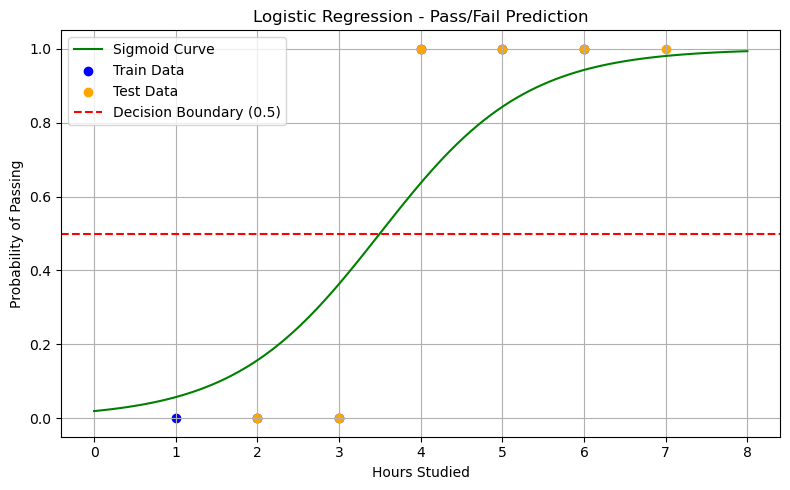

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -----------------------
# 1. Training Data
# -----------------------
train_data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6],
    'Pass': [0, 0, 0, 1, 1, 1]
}
df_train = pd.DataFrame(train_data)

X_train = df_train[['Hours_Studied']]
y_train = df_train['Pass']

# -----------------------
# 2. Test Data
# -----------------------
test_data = {
    'Hours_Studied': [2, 3, 4, 5, 6, 7],
    'Pass': [0, 0, 1, 1, 1, 1]
}
df_test = pd.DataFrame(test_data)

X_test = df_test[['Hours_Studied']]
y_test = df_test['Pass']

# -----------------------
# 3. Train Model
# -----------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# -----------------------
# 4. Predict on Test Data
# -----------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Pass)

# -----------------------
# 5. Evaluate
# -----------------------
accuracy = accuracy_score(y_test, y_pred)
df_test['Predicted'] = y_pred
df_test['Probability'] = y_prob

print("\n Test Data Predictions:")
print(df_test)
print(f"\n Accuracy on test data: {accuracy:.2f}")

# -----------------------
# 6. Plot Sigmoid Curve
# -----------------------
# Create smooth curve for visualization
all_hours = np.linspace(0, 8, 100).reshape(-1, 1)
all_hours_df = pd.DataFrame(all_hours, columns=['Hours_Studied'])  # FIX applied here
all_probs = model.predict_proba(all_hours_df)[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(all_hours, all_probs, label='Sigmoid Curve', color='green')
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression - Pass/Fail Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.9050

Confusion Matrix:
 [[94  6]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       100
           1       0.94      0.87      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200

ROC AUC Score: 0.9457


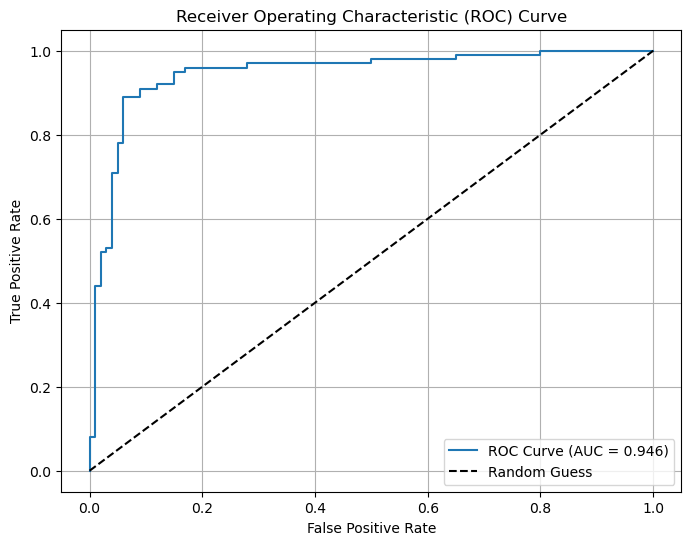

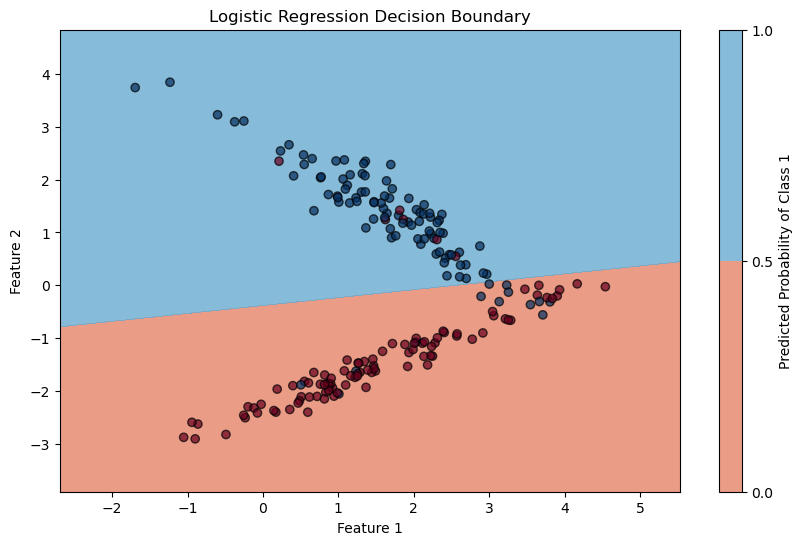

In [1]:
# Logistic Regression (Binary Classification) - Full Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

# 1. Generate synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000,    # total samples
    n_features=2,      # number of features (for visualization ease)
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0.1,        # noise
    class_sep=1.5,     # separation between classes
    random_state=42
)

# 2. Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Predict on test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

# 6. Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 7. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# 8. Visualize decision boundary (only for 2D features)
def plot_decision_boundary(X, y, model, scaler):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    # Flatten and scale mesh grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    # Predict class probabilities for each point in the grid
    probs = model.predict_proba(grid_scaled)[:, 1].reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    # Contour plot for decision boundary at probability=0.5
    contour = plt.contourf(xx, yy, probs, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.RdBu)
    plt.colorbar(contour, label='Predicted Probability of Class 1')
    # Scatter plot for actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model, scaler)



Iris OvR Accuracy: 1.00
Iris Softmax Accuracy: 1.00

Iris Feature Importance:
             Feature    Weight
1   sepal width (cm)  0.962589
0  sepal length (cm) -0.393400
3   petal width (cm) -0.998746
2  petal length (cm) -2.375107

Best params for class 0: {'clf__C': 10.0, 'clf__l1_ratio': 0.2}

Best params for class 1: {'clf__C': 1.0, 'clf__l1_ratio': 0.5}

Best params for class 2: {'clf__C': 0.1, 'clf__l1_ratio': 0.5}

Wine Custom OvR Accuracy: 1.00


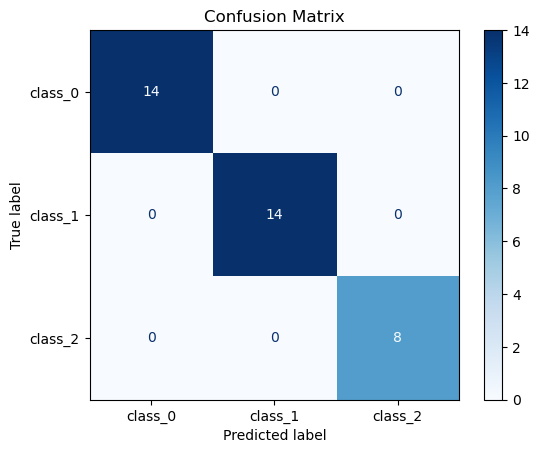


Wine Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Wine Feature Importance (Class 0):
                         Feature    Weight
12                       proline  3.009795
0                        alcohol  2.372378
2                            ash  1.971191
11  od280/od315_of_diluted_wines  1.917758
6                     flavanoids  1.550121
1                     malic_acid  0.825853
5                  total_phenols  0.409127
4                      magnesium  0.113927
9                color_intensity -0.044107
10                           hue -0.083981
8                proanthocyanins -0.137373
7           nonflavanoid_phenols -0.16

In [15]:
# =====================
# Core Imports
# =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# =====================
# Helper Functions
# =====================
def sigmoid(z):
    """Logistic function for binary classification"""
    return 1 / (1 + np.exp(-z))

def softmax(theta, X):
    """Multinomial logistic regression softmax function"""
    z = X @ theta.T
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def plot_confusion(y_true, y_pred, classes):
    """Visualize confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

def predict_ensemble(classifiers, X):
    """Custom OvR prediction function"""
    probas = np.array([clf.predict_proba(X)[:,1] for clf in classifiers]).T
    return np.argmax(probas, axis=1)

# =====================
# Iris Dataset Example
# =====================
# Load and Split Data
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Built-in Implementations
# ------------------------
# One-vs-Rest Approach
ovr_model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
ovr_model.fit(X_train_iris, y_train_iris)
ovr_preds = ovr_model.predict(X_test_iris)
print(f"\nIris OvR Accuracy: {accuracy_score(y_test_iris, ovr_preds):.2f}")

# Multinomial (Softmax) Approach
softmax_model = LogisticRegression(solver='lbfgs', max_iter=1000)
softmax_model.fit(X_train_iris, y_train_iris)
softmax_preds = softmax_model.predict(X_test_iris)
print(f"Iris Softmax Accuracy: {accuracy_score(y_test_iris, softmax_preds):.2f}")

# Feature Importance for Iris
print("\nIris Feature Importance:")
iris_feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Weight': softmax_model.coef_[0]
}).sort_values('Weight', ascending=False)
print(iris_feature_importance)

# =====================
# Wine Dataset Example
# =====================
# Load and Prepare Data
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

# Custom OvR Implementation
# -------------------------
classifiers = []
for class_idx in range(3):
    # Create binary labels for current class
    y_binary = (y_train_wine == class_idx).astype(int)
    
    # Pipeline with standardization and classifier
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(solver='saga', penalty='elasticnet', 
                                l1_ratio=0.5, max_iter=10000))
    ])
    
    # Hyperparameter Tuning
    params = {
        'clf__C': [0.1, 1.0, 10.0],
        'clf__l1_ratio': [0.2, 0.5, 0.8]
    }
    
    grid = GridSearchCV(pipe, params, cv=3, scoring='accuracy')
    grid.fit(X_train_wine, y_binary)
    
    classifiers.append(grid.best_estimator_)
    print(f"\nBest params for class {class_idx}: {grid.best_params_}")

# Ensemble Predictions
ensemble_preds = predict_ensemble(classifiers, X_test_wine)
print(f"\nWine Custom OvR Accuracy: {accuracy_score(y_test_wine, ensemble_preds):.2f}")

# Evaluation Metrics
# ------------------
plot_confusion(y_test_wine, ensemble_preds, wine.target_names)
print("\nWine Classification Report:")
print(classification_report(y_test_wine, ensemble_preds, target_names=wine.target_names))

# Feature Importance for Wine (Class 0 example)
print("\nWine Feature Importance (Class 0):")
clf = classifiers[0].named_steps['clf']
wine_feature_importance = pd.DataFrame({
    'Feature': wine.feature_names,
    'Weight': clf.coef_[0]
}).sort_values('Weight', ascending=False)
print(wine_feature_importance)

# =====================
# Prediction Example
# =====================
new_sample = np.array([[13.2, 4.1, 2.2, 17.0, 80.0, 2.8, 3.5, 0.6, 1.5, 5.0, 1.2, 3.0, 450]])
scaled_sample = StandardScaler().fit(X_train_wine).transform(new_sample)
print("\nNew Sample Prediction:", wine.target_names[predict_ensemble(classifiers, scaled_sample)[0]])


Dataset shape: (768, 9)
First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Training set shape: (614, 8), Test set shape: (154, 8)
Model accuracy on test set: 0.7273


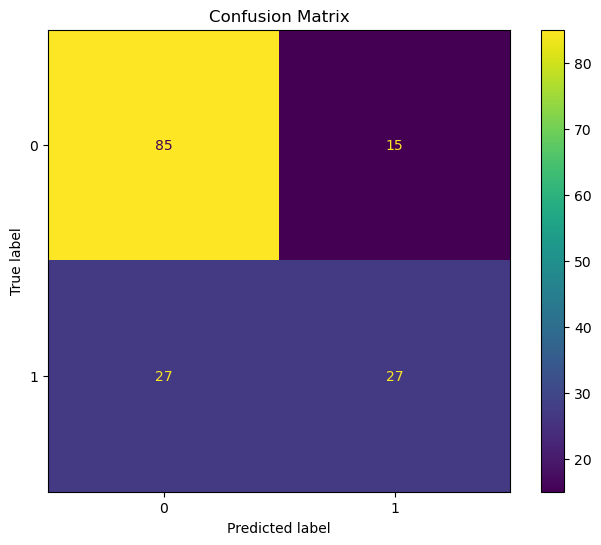

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics

# --- Step 1: Load online dataset (Pima Indians Diabetes) ---
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(url, header=None, names=columns)

print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())

# --- Step 2: Prepare features and target ---
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# --- Step 3: Split dataset into train and test sets ---
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# --- Step 4: Initialize and train Logistic Regression model ---
lm = linear_model.LogisticRegression(solver='liblinear', max_iter=1000)
lm.fit(X_train, y_train)

# --- Step 5: Predict and evaluate ---
y_pred = lm.predict(X_test)
accuracy = lm.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.4f}")

# --- Step 6: Visualize confusion matrix ---
fig, ax = plt.subplots(figsize=(8, 6))
metrics.ConfusionMatrixDisplay.from_estimator(lm, X_test, y_test, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

# --- Step 7: Print classification report ---
print("Classification Report:\n")
print(metrics.classification_report(y_test, y_pred))


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"C:\Users\RF\Desktop\startup_data.csv"
data = pd.read_csv(file_path)

data.head(5)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


Test Accuracy: 0.7760

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        98
           1       0.40      0.07      0.12        27

    accuracy                           0.78       125
   macro avg       0.60      0.52      0.50       125
weighted avg       0.71      0.78      0.71       125



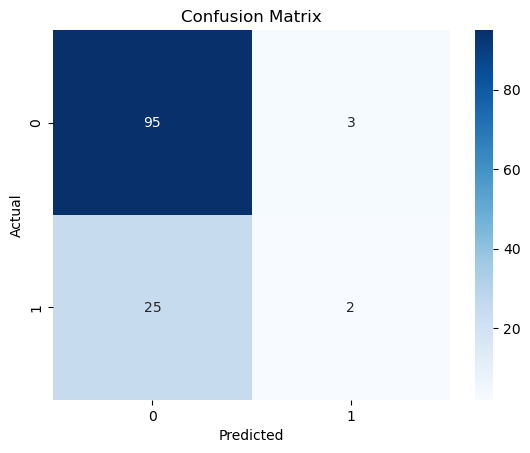


Cross-Validated Accuracy: Mean=0.7813, Std=0.0171

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7867


In [24]:
# Full Logistic Regression Pipeline: Predict Startup Success vs Failure

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Data
file_path = r"C:\Users\RF\Desktop\startup_data.csv"  # Update path if needed
data = pd.read_csv(file_path)

# 2. Create binary target: Success (1 = Acquired, 0 = not Acquired)
data['Success'] = data['Exit Status'].apply(lambda x: 1 if x == 'Acquired' else 0)

# 3. Drop unnecessary columns
data.drop(columns=['Startup Name', 'Exit Status'], inplace=True)

# 4. Encode categorical variables
categorical_cols = ['Industry', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 5. Features & target
X = data.drop(columns=['Success'])
y = data['Success']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

# 7. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 9. Evaluation
y_pred = model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"\nCross-Validated Accuracy: Mean={cv_scores.mean():.4f}, Std={cv_scores.std():.4f}")

# 11. Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Score: {grid.best_score_:.4f}")


Test Accuracy: 0.7760

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        98
           1       0.40      0.07      0.12        27

    accuracy                           0.78       125
   macro avg       0.60      0.52      0.50       125
weighted avg       0.71      0.78      0.71       125



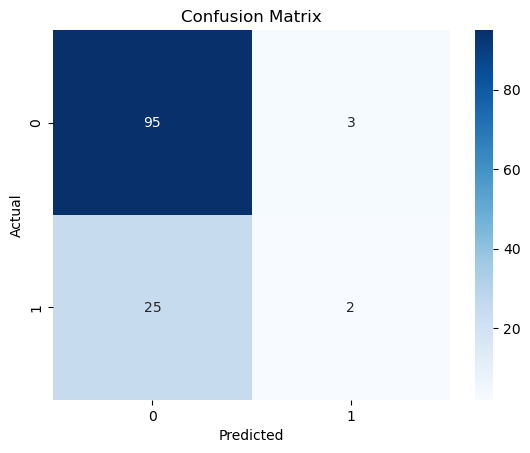


Cross-Validated Accuracy: Mean=0.7813, Std=0.0171

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7867


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Data
file_path = r"C:\Users\RF\Desktop\startup_data.csv"
data = pd.read_csv(file_path)

data.head(5)

# 2. Create binary target: Success (1 = Acquired, 0 = not Acquired)
data['Success'] = data['Exit Status'].apply(lambda x: 1 if x == 'Acquired' else 0)

# 3. Drop unnecessary columns
data.drop(columns=['Startup Name', 'Exit Status'], inplace=True)

# 4. Encode categorical variables
categorical_cols = ['Industry', 'Region']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 5. Features & target
X = data.drop(columns=['Success'])
y = data['Success']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

# 7. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 9. Evaluation
y_pred = model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"\nCross-Validated Accuracy: Mean={cv_scores.mean():.4f}, Std={cv_scores.std():.4f}")

# 11. Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Score: {grid.best_score_:.4f}")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


